In [15]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [16]:
# %% Import and read data
df = pd.read_excel('wines.xlsx')
data = df.to_numpy()
wines = torch.from_numpy(data)
wines.shape

torch.Size([20, 12])

In [17]:
# %% Split dataset(white wines)
x = wines[:10,:11]
y = wines[:10,11]

### Calculate betas
![betas](images\betas.jpg)

In [18]:
# %% Calculate betas
betas = []
y_mean =  y.mean()

for i in range(len(x[0,:])): 
    num = 0
    denom = 0
    for j in range(len(x[:])):
        x_diff = (x[j][i] - torch.mean(x[:,i]))
        y_diff = (y[j] - y_mean)
        num +=  x_diff * y_diff 
        denom += x_diff**2
    betas.append(num/denom)
# calculations in pdf may be wrong
# Check again!!

### Calcualte beta_0
![beta_0](images\beta_0.jpg)

In [19]:
# %% Calculate b_0
sum = 0
for i,(b) in enumerate(betas):
    sum += b * torch.mean(x[:,i])
    
beta_0 = y_mean - sum    
print(beta_0)

tensor(340.9121, dtype=torch.float64)


### Calculate Y(prediction)
![betas](images\prediction.jpg)

In [23]:
# %% Calculate Y
preds= []
pred = 0
 
for i in range(len(x[:])):
    for j in range(len(x[0,:])):
        pred += betas[j]*x[i][j]    
        
    pred = (pred+beta_0).item()
    print(pred.)
    preds.append(pred)
    pred = 0
  

5.813419484875169
7.570636018453968
1.0860521228962625
7.122744785154055
5.163082559136285
0.7368382252400352
10.590497102606207
8.838122038016536
3.9706582787413254
7.107949384880726


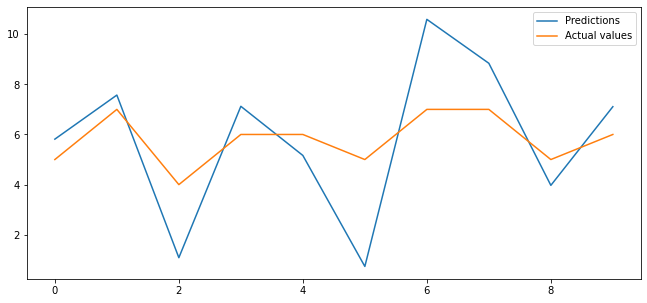

In [25]:
# %% Visualize results
import matplotlib.pyplot as plt

plt.figure(figsize=(11,5))
plt.plot(preds, label="Predictions")
plt.plot(y, label="Actual values")

plt.legend()
plt.show()
    